In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors

In [2]:
matplotlib.rc('font', family='Arial') 

In [3]:

pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS",   # Timor-Leste
    "GEO", #Georgia
    'SWZ'
]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]


possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [4]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[df['country'].isin(possible_iso)]
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
df = df[df['year'].isin(range(2002, 2020))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df['post']=df['year'].apply(lambda x: 0 if x>=2002 and x<=2010 else 1 )

df_sample=df.groupby(['Mention_country','post'])['count'].sum().reset_index()
df_sample['count']/=9
df_pivoted = df_sample.pivot(index=['Mention_country'], columns='post', values='count').reset_index().fillna(0)
df_pivoted.rename(columns={0:'count_pre_ArabSpring', 1:'count_post_ArabSpring'}, inplace=True)
df_pivoted['difference']=(df_pivoted['count_post_ArabSpring']-df_pivoted['count_pre_ArabSpring'])
df_pivoted['rank_pre_ArabSpring']=df_pivoted['count_pre_ArabSpring'].rank(pct=True)
df_pivoted['rank_post_ArabSpring']=df_pivoted['count_post_ArabSpring'].rank(pct=True)
df_pivoted['rank_difference']=df_pivoted['difference'].rank(pct=True)

In [7]:
def find_matches(c):
    rank_country=df_pivoted[df_pivoted['Mention_country']==c]['rank_pre_ArabSpring'].values[0]
    return df_pivoted[(df_pivoted['rank_pre_ArabSpring']>=rank_country-0.05) &(df_pivoted['rank_pre_ArabSpring']<=rank_country+0.05)]['Mention_country'].values

In [18]:
c='egy'
rank_country=df_pivoted[df_pivoted['Mention_country']==c]['rank_pre_ArabSpring'].values[0]
result_df=df_pivoted[(df_pivoted['rank_pre_ArabSpring']>=rank_country-0.05) &(df_pivoted['rank_pre_ArabSpring']<=rank_country+0.05)].sort_values('difference', ascending=False).reset_index(drop=True)

Index=result_df[result_df['Mention_country']==c].index[0]

countries_to_consider=result_df['Mention_country'][:Index+1]

In [42]:
check_df=df.groupby(['Mention_country', 'post', 'Aff_country'])['count'].sum().reset_index()
check_df['count']/=9
check_df=check_df[check_df['Mention_country']!=check_df['Aff_country']]
check_df=check_df[check_df['Mention_country'].isin(countries_to_consider)]
check_df=check_df.pivot(index=['Mention_country', 'Aff_country'], columns='post', values='count').reset_index().fillna(0)
check_df.rename(columns={0:'count_pre_ArabSpring', 1:'count_post_ArabSpring'}, inplace=True)
check_df['difference']=check_df['count_post_ArabSpring']-check_df['count_pre_ArabSpring']
check_df=check_df.sort_values('difference', ascending=False, ignore_index=True)

In [82]:
df_to_merge=None
to_keep=None
for i, c in enumerate(countries_to_consider):
    print(c)
    df2=check_df[check_df['Mention_country']==c].sort_values('difference', ascending=False).reset_index(drop=True)[:10][['Aff_country']].reset_index()
    if i==0:
        to_keep=df2, c
    elif i==1:
        df_to_merge=to_keep[0].merge(df2, on='index', suffixes=[f'_{to_keep[1]}', f'_{c}'])
    else:
        df_to_merge=df_to_merge.merge(df2, suffixes=['', f'_{c}'], on='index')

mys
idn
pak
col
egy


In [85]:
df_to_merge.drop(columns='index').rename(columns={'Aff_country':'Aff_country_pak'})

post,Aff_country_mys,Aff_country_idn,Aff_country_pak,Aff_country_col,Aff_country_egy
0,aus,aus,chn,usa,usa
1,gbr,mys,mys,esp,sau
2,usa,usa,usa,bra,gbr
3,idn,jpn,gbr,mex,deu
4,chn,nld,sau,gbr,ita
5,irn,deu,aus,deu,fra
6,sgp,gbr,ind,can,rus
7,jpn,chn,deu,pol,esp
8,sau,tha,can,arg,jpn
9,tha,kor,tha,chl,isr


In [84]:
countries_to_consider

0    mys
1    idn
2    pak
3    col
4    egy
Name: Mention_country, dtype: object

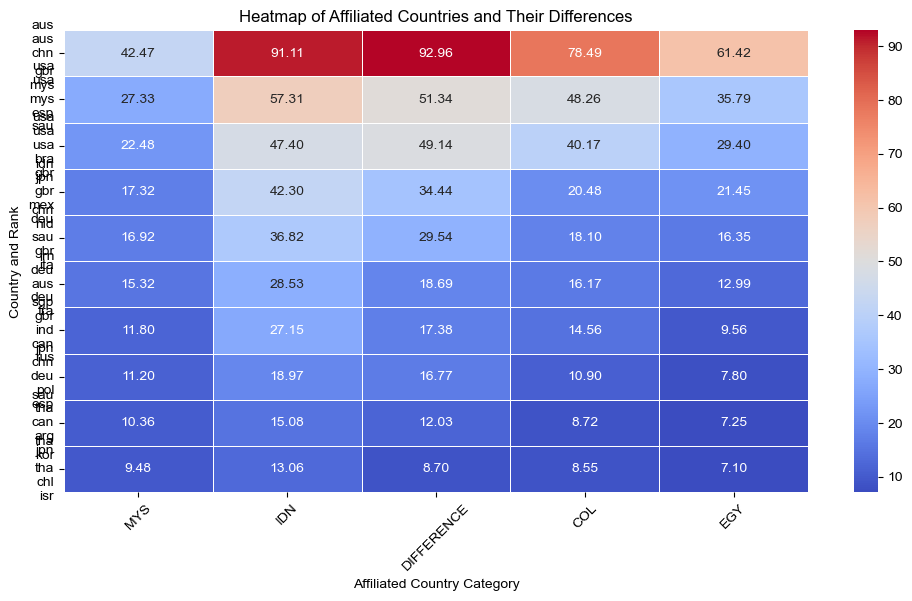

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =df_to_merge.drop(columns='index')

# Creating the heatmap with the correct mapping of affiliated countries and their difference values

# Extracting numerical values for heatmap
heatmap_values = df[[col for col in df.columns if "difference" in col]].values

# Creating labels for the y-axis (Country + Rank)
aff_countries = []
for i in range(len(df)):
    row_labels = [df.iloc[i][col] for col in df.columns if "Aff_country" in col]
    aff_countries.append("\n".join(row_labels))

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_values, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)

# Setting labels
ax.set_xticklabels([col.replace("difference_", "").upper() for col in df.columns if "difference" in col], rotation=45)
ax.set_yticks(np.arange(len(df)) + 0.5)
ax.set_yticklabels(aff_countries, rotation=0)

plt.title("Heatmap of Affiliated Countries and Their Differences")
plt.xlabel("Affiliated Country Category")
plt.ylabel("Country and Rank")

plt.show()


In [81]:
df_to_merge

post,index,Aff_country_mys,difference_mys,Aff_country_idn,difference_idn,Aff_country,difference,Aff_country_col,difference_col,Aff_country_egy,difference_egy
0,0,aus,42.466390,aus,91.112604,chn,92.964837,usa,78.486697,usa,61.421940
1,1,gbr,27.329195,mys,57.313775,mys,51.337055,esp,48.258481,sau,35.793686
2,2,usa,22.481861,usa,47.404090,usa,49.143143,bra,40.169884,gbr,29.404174
3,3,idn,17.321040,jpn,42.303162,gbr,34.440724,mex,20.475573,deu,21.447648
4,4,chn,16.924536,nld,36.819678,sau,29.536327,gbr,18.099413,ita,16.347999
5,5,irn,15.315192,deu,28.531877,aus,18.691253,deu,16.169907,fra,12.993877
6,6,sgp,11.803471,gbr,27.149707,ind,17.381751,can,14.555703,rus,9.560900
7,7,jpn,11.198229,chn,18.974826,deu,16.766559,pol,10.904398,esp,7.796124
8,8,sau,10.362521,tha,15.075481,can,12.029670,arg,8.715391,jpn,7.249507
9,9,tha,9.482848,kor,13.061482,tha,8.704422,chl,8.547228,isr,7.100096


<Axes: >

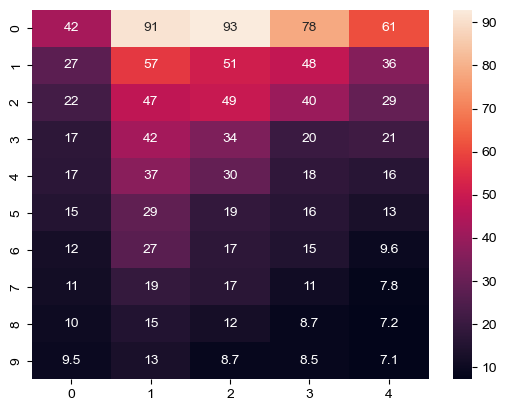

In [80]:
sns.heatmap(heatmap_values, annot=True)